<a href="https://colab.research.google.com/github/Davi2107/Komputer_Grafis/blob/main/Metode_Tsukamoto_dan_Metode_Mamdani.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Jumlah produksi rokok yang harus diproduksi: 3500.00 karton


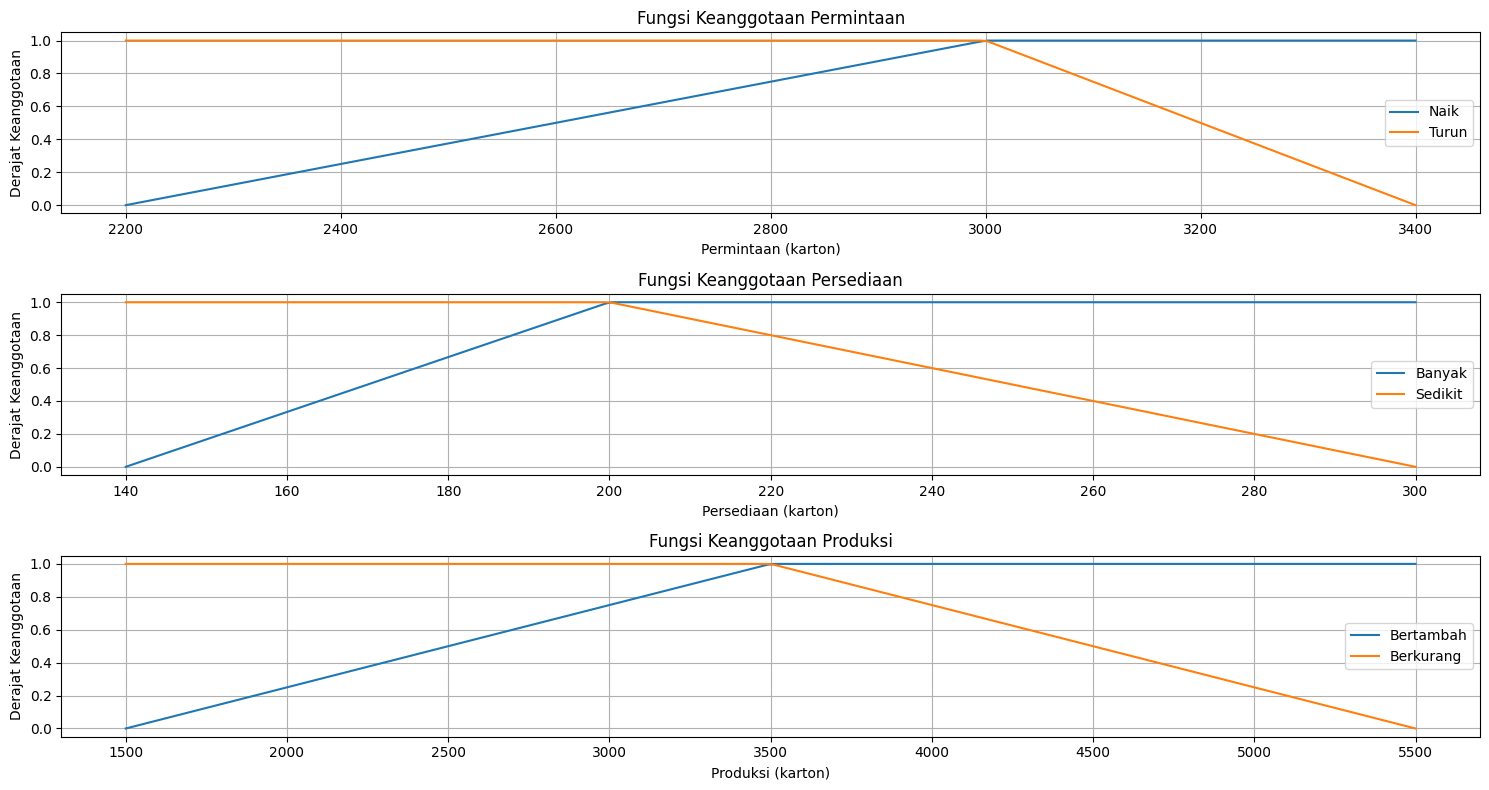

In [2]:
# Import library
import numpy as np
import matplotlib.pyplot as plt

# Fungsi keanggotaan untuk permintaan
def permintaan_naik(x):
    if x <= 2200:
        return 0
    elif x <= 3000:
        return (x - 2200) / (3000 - 2200)
    else:
        return 1

def permintaan_turun(x):
    if x >= 3400:
        return 0
    elif x >= 3000:
        return (3400 - x) / (3400 - 3000)
    else:
        return 1

# Fungsi keanggotaan untuk persediaan
def persediaan_banyak(y):
    if y <= 140:
        return 0
    elif y <= 200:
        return (y - 140) / (200 - 140)
    else:
        return 1

def persediaan_sedikit(y):
    if y >= 300:
        return 0
    elif y >= 200:
        return (300 - y) / (300 - 200)
    else:
        return 1

# Fungsi keanggotaan untuk produksi
def produksi_bertambah(z):
    if z <= 1500:
        return 0
    elif z <= 3500:
        return (z - 1500) / (3500 - 1500)
    else:
        return 1

def produksi_berkurang(z):
    if z >= 5500:
        return 0
    elif z >= 3500:
        return (5500 - z) / (5500 - 3500)
    else:
        return 1

# Fungsi inferensi
def inferensi(permintaan, persediaan):
    aturan = []
    μ1 = min(permintaan_naik(permintaan), persediaan_banyak(persediaan))
    aturan.append(("bertambah", μ1))

    μ2 = min(permintaan_naik(permintaan), persediaan_sedikit(persediaan))
    aturan.append(("bertambah", μ2))

    μ3 = min(permintaan_turun(permintaan), persediaan_banyak(persediaan))
    aturan.append(("berkurang", μ3))

    μ4 = min(permintaan_turun(permintaan), persediaan_sedikit(persediaan))
    aturan.append(("berkurang", μ4))

    return aturan

# Defuzzifikasi dengan rata-rata terbobot
def defuzzifikasi(aturan):
    z_total = 0
    μ_total = 0
    for output, μ in aturan:
        if μ > 0:
            if output == "bertambah":
                z = 1500 + μ * (3500 - 1500)
            elif output == "berkurang":
                z = 5500 - μ * (5500 - 3500)
            z_total += z * μ
            μ_total += μ
    return z_total / μ_total if μ_total != 0 else 0

# Input data
permintaan = 3000
persediaan = 200

# Proses fuzzifikasi dan inferensi
aturan = inferensi(permintaan, persediaan)

# Proses defuzzifikasi
produksi = defuzzifikasi(aturan)

# Output hasil
print(f"Jumlah produksi rokok yang harus diproduksi: {produksi:.2f} karton")

# Grafik fungsi keanggotaan
x = np.linspace(2200, 3400, 200)
y = np.linspace(140, 300, 200)
z = np.linspace(1500, 5500, 200)

# Plot fungsi keanggotaan Permintaan
plt.figure(figsize=(15, 8))
plt.subplot(3, 1, 1)
plt.plot(x, [permintaan_naik(i) for i in x], label="Naik")
plt.plot(x, [permintaan_turun(i) for i in x], label="Turun")
plt.title("Fungsi Keanggotaan Permintaan")
plt.xlabel("Permintaan (karton)")
plt.ylabel("Derajat Keanggotaan")
plt.legend()
plt.grid()

# Plot fungsi keanggotaan Persediaan
plt.subplot(3, 1, 2)
plt.plot(y, [persediaan_banyak(i) for i in y], label="Banyak")
plt.plot(y, [persediaan_sedikit(i) for i in y], label="Sedikit")
plt.title("Fungsi Keanggotaan Persediaan")
plt.xlabel("Persediaan (karton)")
plt.ylabel("Derajat Keanggotaan")
plt.legend()
plt.grid()

# Plot fungsi keanggotaan Produksi
plt.subplot(3, 1, 3)
plt.plot(z, [produksi_bertambah(i) for i in z], label="Bertambah")
plt.plot(z, [produksi_berkurang(i) for i in z], label="Berkurang")
plt.title("Fungsi Keanggotaan Produksi")
plt.xlabel("Produksi (karton)")
plt.ylabel("Derajat Keanggotaan")
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()


<ipython-input-4-a2c1f89bfd11>:53: RuntimeWarning: invalid value encountered in scalar divide
  z_centroid = numerator / denominator


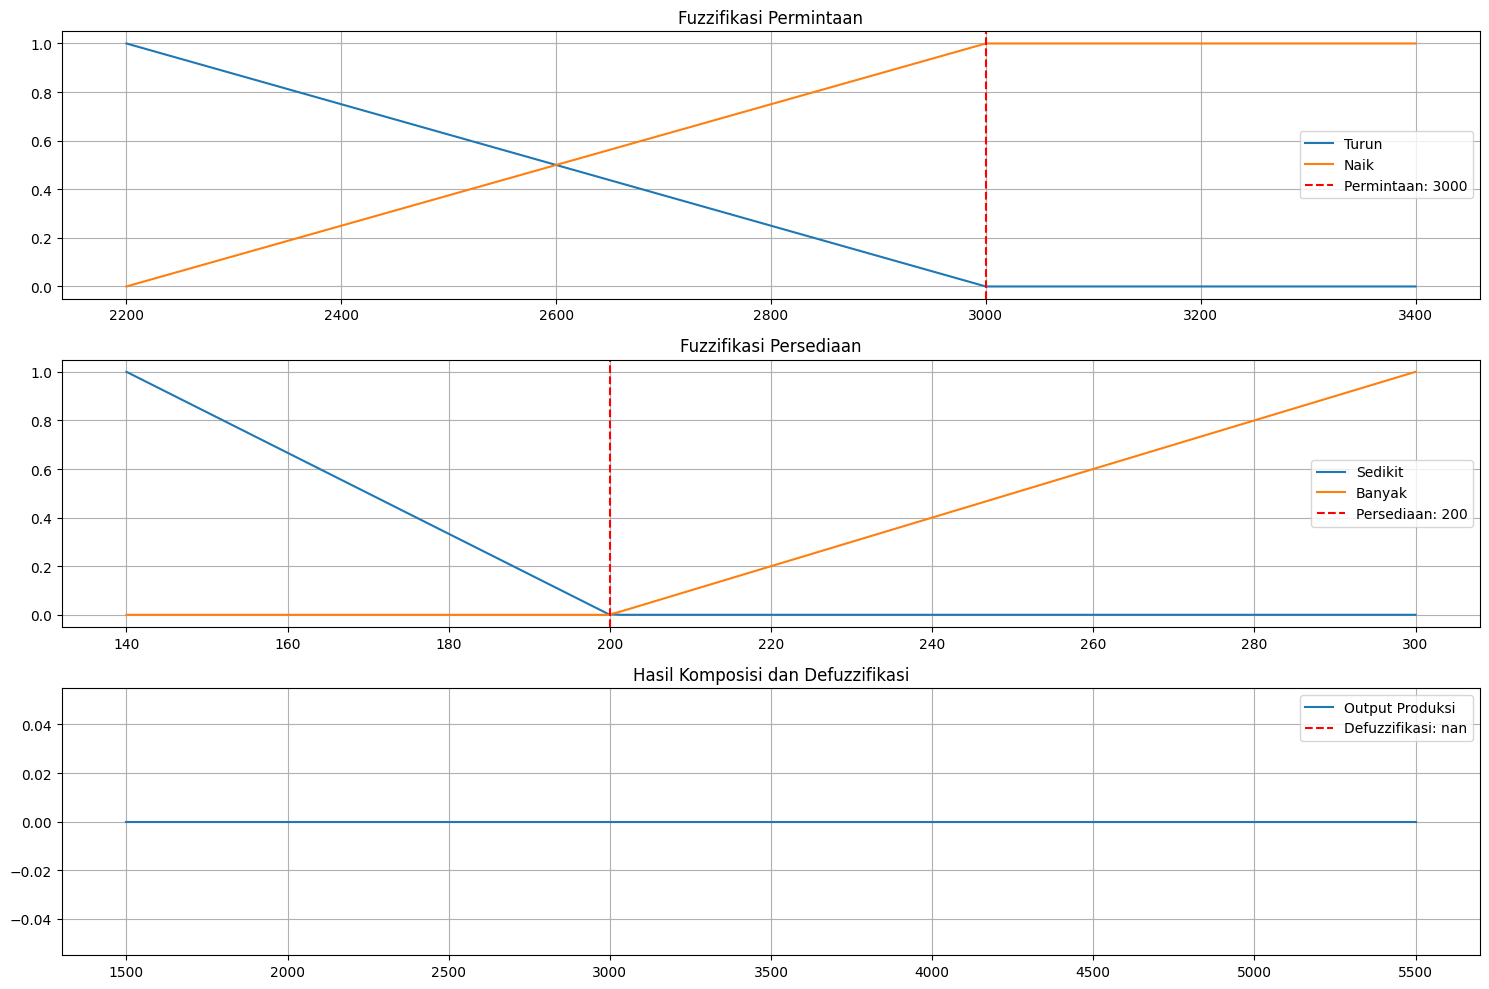

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Fungsi keanggotaan untuk variabel Permintaan
def permintaan_turun(x):
    return np.where(x <= 2200, 1, np.where(x <= 3000, (3000 - x) / (3000 - 2200), 0))

def permintaan_naik(x):
    return np.where(x <= 2200, 0, np.where(x <= 3000, (x - 2200) / (3000 - 2200), 1))

# Fungsi keanggotaan untuk variabel Persediaan
def persediaan_sedikit(y):
    return np.where(y <= 140, 1, np.where(y <= 200, (200 - y) / (200 - 140), 0))

def persediaan_banyak(y):
    return np.where(y <= 200, 0, np.where(y <= 300, (y - 200) / (300 - 200), 1))

# Fungsi keanggotaan untuk variabel Produksi
def produksi_berkurang(z):
    return np.where(z <= 1500, 1, np.where(z <= 3000, (3000 - z) / (3000 - 1500), 0))

def produksi_bertambah(z):
    return np.where(z <= 3000, 0, np.where(z <= 5500, (z - 3000) / (5500 - 3000), 1))

# Input nilai Permintaan dan Persediaan
x = 3000  # Permintaan
y = 200   # Persediaan

# Fuzzifikasi
μPmt_NA = permintaan_naik(x)
μPmt_TU = permintaan_turun(x)
μPsd_SE = persediaan_sedikit(y)
μPsd_BA = persediaan_banyak(y)

# Aplikasi fungsi implikasi
α1 = min(μPmt_NA, μPsd_BA)  # Rule 1
α2 = min(μPmt_NA, μPsd_SE)  # Rule 2
α3 = min(μPmt_TU, μPsd_BA)  # Rule 3
α4 = min(μPmt_TU, μPsd_SE)  # Rule 4

# Hasil z untuk setiap aturan
z = np.linspace(1500, 5500, 1000)
μz = np.maximum.reduce([
    np.minimum(α1, produksi_bertambah(z)),
    np.minimum(α2, produksi_bertambah(z)),
    np.minimum(α3, produksi_berkurang(z)),
    np.minimum(α4, produksi_berkurang(z))
])

# Defuzzifikasi menggunakan metode Centroid
numerator = np.sum(z * μz)
denominator = np.sum(μz)
z_centroid = numerator / denominator

# Plot hasil fuzzifikasi
plt.figure(figsize=(15, 10))

# Permintaan
plt.subplot(3, 1, 1)
plt.title('Fuzzifikasi Permintaan')
x_vals = np.linspace(2200, 3400, 100)
plt.plot(x_vals, permintaan_turun(x_vals), label='Turun')
plt.plot(x_vals, permintaan_naik(x_vals), label='Naik')
plt.axvline(x, color='r', linestyle='--', label='Permintaan: 3000')
plt.legend()
plt.grid()

# Persediaan
plt.subplot(3, 1, 2)
plt.title('Fuzzifikasi Persediaan')
y_vals = np.linspace(140, 300, 100)
plt.plot(y_vals, persediaan_sedikit(y_vals), label='Sedikit')
plt.plot(y_vals, persediaan_banyak(y_vals), label='Banyak')
plt.axvline(y, color='r', linestyle='--', label='Persediaan: 200')
plt.legend()
plt.grid()

# Produksi
plt.subplot(3, 1, 3)
plt.title('Hasil Komposisi dan Defuzzifikasi')
plt.plot(z, μz, label='Output Produksi')
plt.axvline(z_centroid, color='r', linestyle='--', label=f'Defuzzifikasi: {z_centroid:.2f}')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()
